In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import math
import json 
import matplotlib.pyplot as plt
import os
import time
from sklearn.neighbors import KNeighborsClassifier


In [3]:
arrayOfLeads = ['leadI', 'leadII', 'leadIII', 'AVR', 'AVL', 'AVF']

def getLeadsAsDF(leads, dataFromDF):
    leadsAsDF = []
    for lead in leads:
        if lead in dataFromDF['samples']:
            leadsAsDF.append(dataFromDF['samples'][lead][5000:8000])
        else:
            return None
    return leadsAsDF

def getLeadAsDF(folderName, fileName):
    with open(F"hackathon-alivecors/{folderName}/ecg/{fileName}") as f:
        data = f.readlines()
    parsedAsJson = [json.loads(line) for line in data]
    df = pd.DataFrame(parsedAsJson)
    dataFromDF = df['data'][0]['raw']
   
    leadsDF = getLeadsAsDF(arrayOfLeads, dataFromDF)
    if leadsDF is None:
        return None
    leadsDF = pd.DataFrame(leadsDF)
    leadsDF = leadsDF.transpose()
    leadsDF.columns = arrayOfLeads
    return leadsDF

In [4]:

arrayOfLeads = ['leadI', 'leadII', 'leadIII', 'AVR', 'AVL', 'AVF']

with open('hackathon-alivecors/AC1238426/ecg/strip30.txt') as f:
    data = f.readlines()

parsedAsJson = [json.loads(line) for line in data]
df = pd.DataFrame(parsedAsJson)
dataFromDF = df['data'][0]['enhanced']


leadsDF = getLeadsAsDF(arrayOfLeads, dataFromDF)

leadsDF = pd.DataFrame(leadsDF)
leadsDF = leadsDF.transpose()
leadsDF.columns = arrayOfLeads

leadsDF.head()

,leadI,leadII,leadIII,AVR,AVL,AVF
0,236,3,-233,-119,235,-115
1,417,74,-343,-245,380,-134
2,668,206,-462,-437,565,-128
3,992,377,-615,-684,804,-119
4,1379,595,-784,-987,1082,-94


In [5]:

leadsDF.describe()

,leadI,leadII,leadIII,AVR,AVL,AVF
count,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000
mean,50.072667,50.429667,0.35700,-50.260000,24.842667,25.372333
std,557.798431,379.501975,279.52646,455.959451,398.421139,182.504066
min,-1965.000000,-1038.000000,-1070.00000,-2560.000000,-1594.000000,-481.000000
25%,-267.000000,-141.000000,-145.00000,-196.250000,-215.250000,-73.000000
50%,-32.000000,-7.000000,24.00000,18.000000,-28.000000,5.500000
75%,250.000000,163.000000,162.25000,198.000000,185.000000,85.000000
max,2864.000000,2283.000000,1303.00000,1401.000000,1830.000000,1068.000000


In [6]:
leadsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   leadI    3000 non-null   int64
 1   leadII   3000 non-null   int64
 2   leadIII  3000 non-null   int64
 3   AVR      3000 non-null   int64
 4   AVL      3000 non-null   int64
 5   AVF      3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


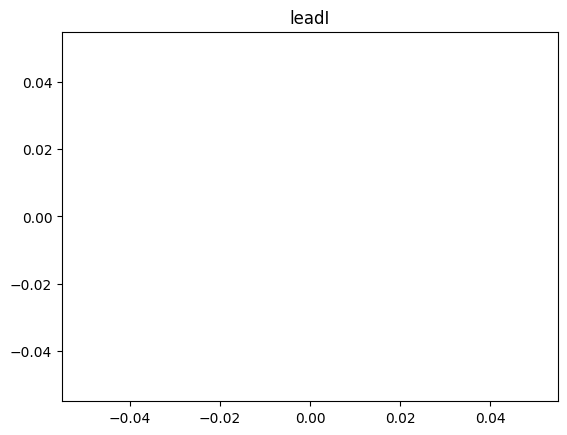

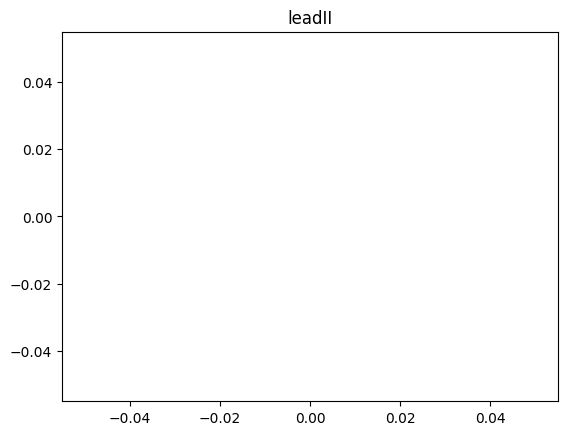

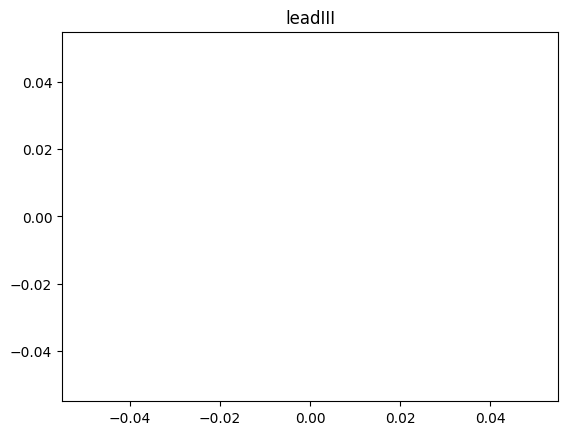

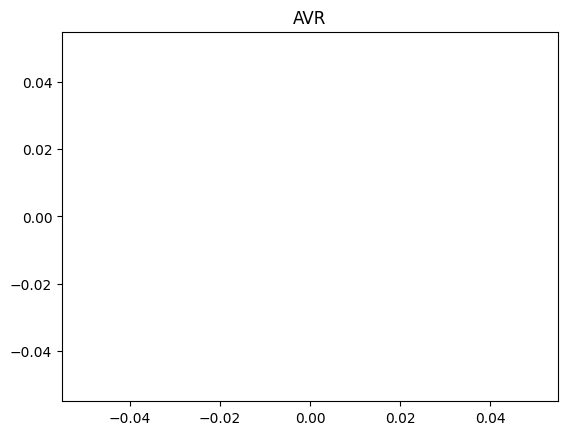

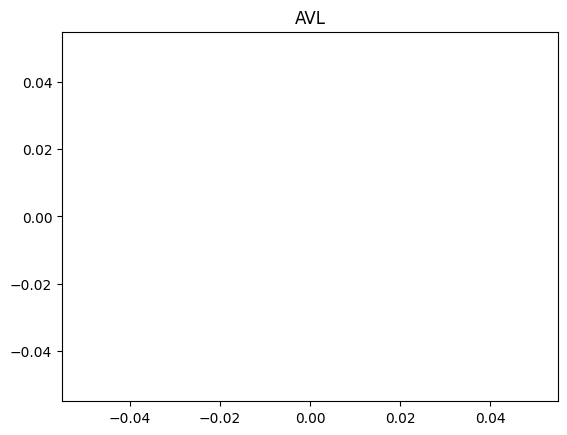

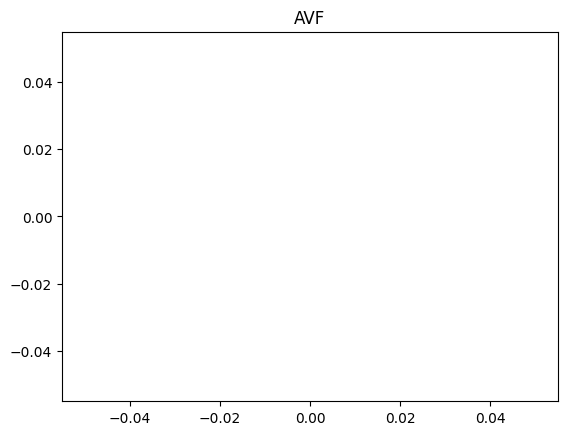

In [31]:

# make charts for each lead only for middle part of the signal
def makeChartsForLeads(leadsDF):
    for lead in arrayOfLeads:
        plt.plot(leadsDF[lead][5000:8000])
        plt.title(lead)
        plt.show()

makeChartsForLeads(leadsDF)


In [8]:
# save all folder names from /hackathon-alivecors/ to measurements array
def readMeasurements():
    measurements = []
    for measurement in os.listdir('hackathon-alivecors/'):
        if (F'hackathon-alivecors/{measurement}/dg.txt') is not None:
            measurements.append(measurement)
    return measurements

# for each measurement folder get all txt files and save them to array 
def getTxtFilesFromMeasurementFolder(measurement):
    txtFiles = []
    if os.path.exists('hackathon-alivecors/' + measurement + '/ecg/'):
        for file in os.listdir('hackathon-alivecors/' + measurement + '/ecg/'):
            if file.endswith('.txt'):
                txtFiles.append(file)
        return txtFiles

def createTupleWithMeasurement(measurement, x):
    return (measurement, x)

folders = readMeasurements()

measurementTuple = []

for measurement in folders:
    measurementTuple.append(createTupleWithMeasurement(measurement, getTxtFilesFromMeasurementFolder(measurement)))
        
# print(measurementTuple)
dataFrameMeasurementTuple = []


def getLeadsAsDFForAllTxtFiles(measurementTuple):
    for measurement in measurementTuple:
        if measurement[1] is not None:
            for file in measurement[1]:
                temp = getLeadAsDF(measurement[0], file)
                if temp is not None:
                    dataFrameMeasurementTuple.append(createTupleWithMeasurement(measurement[0],temp))

getLeadsAsDFForAllTxtFiles(measurementTuple)
print(dataFrameMeasurementTuple)

[('AC1461116',       leadI  leadII  leadIII   AVR  AVL  AVF
0      1044    1057       13 -1050  516  535
1       984     987        3  -985  491  495
2       934     927       -7  -930  471  460
3       986     973      -13  -979  500  480
4      1112    1139       27 -1125  543  583
...     ...     ...      ...   ...  ...  ...
2995    102    -248     -350    73  226 -299
2996     10    -262     -272   126  141 -267
2997    -53    -227     -174   140   60 -201
2998    -59    -207     -148   133   44 -178
2999    -35    -232     -197   133   81 -215

[3000 rows x 6 columns]), ('AC1461116',       leadI  leadII  leadIII   AVR  AVL   AVF
0        77      94       17   -85   30    56
1       245     386      141  -315   52   264
2       480     734      254  -607  113   494
3       711    1136      425  -923  143   781
4       931    1632      701 -1281  115  1167
...     ...     ...      ...   ...  ...   ...
2995    -15     -80      -65    47   25   -73
2996    -68    -114      -46    91  

In [9]:
folders = readMeasurements()
folderCodeDict = {}
allCodes = set()
def cleanFolderCodeDict(folderCodeDict):
    for key in list(folderCodeDict):
        if not folderCodeDict[key]:
            del folderCodeDict[key]

def changeFolderCodeDictToNotDiagnosed(folderCodeDict):
    for key in folderCodeDict:
        if not folderCodeDict[key]:
            folderCodeDict[key] = set()
            folderCodeDict[key].add("NotDiagnosed")

def folderNameToCodeDict(folders):
    for key in folders:
        if key == '.DS_Store':
            continue
        diags = set()
        if os.path.exists('hackathon-alivecors/' + key + '/dg.txt'):
            with open(F"hackathon-alivecors/{key}/dg.txt", "rb") as f:
                text = f.read().decode("windows-1250")
                text = text.split('"')
                for i in range(len(text)):
                    if text[i].startswith("R00.2") or text[i].startswith("I"):
                        if text[i].find(":") != -1:
                            diags.add(text[i].split(":")[0])
                            allCodes.add(text[i].split(":")[0])
            folderCodeDict[key] = diags

folderNameToCodeDict(folders)

changeFolderCodeDictToNotDiagnosed(folderCodeDict)

# print((folderCodeDict))

codeAndDataDict = {}

# iterate over folderCodeDict and add diagnosis to dataFrameMeasurementTuple
def convertTupleToDict(dataFrameMeasurementTuple, folderCodeDict):
    for measurement in dataFrameMeasurementTuple:
        if measurement[0] in folderCodeDict:
            for x in folderCodeDict[measurement[0]]:
                if x in codeAndDataDict:
                    codeAndDataDict[x].append(measurement[1])
                else:
                    codeAndDataDict[x] = []
                    codeAndDataDict[x].append(measurement[1])

convertTupleToDict(dataFrameMeasurementTuple, folderCodeDict)

print((codeAndDataDict))


{'R00.2': [      leadI  leadII  leadIII   AVR  AVL  AVF
0      1044    1057       13 -1050  516  535
1       984     987        3  -985  491  495
2       934     927       -7  -930  471  460
3       986     973      -13  -979  500  480
4      1112    1139       27 -1125  543  583
...     ...     ...      ...   ...  ...  ...
2995    102    -248     -350    73  226 -299
2996     10    -262     -272   126  141 -267
2997    -53    -227     -174   140   60 -201
2998    -59    -207     -148   133   44 -178
2999    -35    -232     -197   133   81 -215

[3000 rows x 6 columns],       leadI  leadII  leadIII   AVR  AVL   AVF
0        77      94       17   -85   30    56
1       245     386      141  -315   52   264
2       480     734      254  -607  113   494
3       711    1136      425  -923  143   781
4       931    1632      701 -1281  115  1167
...     ...     ...      ...   ...  ...   ...
2995    -15     -80      -65    47   25   -73
2996    -68    -114      -46    91  -11   -80
2997    -

In [10]:
print(len(dataFrameMeasurementTuple))

1679


In [32]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
numberArray = []
inputArray = []
advancedInputArray = []
def createInput(codeAndDataDict):
    for key in codeAndDataDict:
        for data in codeAndDataDict[key]:
            advancedInputArray.append(data)
            flatten = data.values.flatten()
            reshaped = np.reshape(flatten, (1, -1))
            array = reshaped.tolist()
            if len(array[0]) != 18000:
                break
            inputArray.append(array[0])
            numberArray.append(key)


createInput(codeAndDataDict)

neigh.fit(inputArray, numberArray)


print(neigh.predict(inputArray[200:600]))

['I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1'
 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1'
 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1'
 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1'
 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1'
 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1'
 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1'
 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I47.1' 'I10' 'I10' 'I10' 'I10' 'I10'
 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10'
 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10'
 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10'
 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10'
 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I10' 'I35.1'
 'I35.1' 'I35.1' 'I35.1' 'I35.1' 'I35.1' 'I35.1' 'I

In [12]:
print(allCodes)

{'I42.8', 'I48.3', 'I49.1', 'I48.0', 'I42.2', 'R00.2', 'I49.9', 'I42.1', 'I47.9', 'I15.1', 'I35.1', 'I35.0', 'I47.2', 'I44.1', 'I46.0', 'I49.0', 'I50.1', 'I10', 'I50.0', 'I47.1', 'I49.3'}


In [13]:
folderCodeDict

{'AC1461116': {'R00.2'},
 'AC1307772': {'R00.2'},
 'AC1367451': {'I47.1', 'I49.1'},
 'AC1238426': {'R00.2'},
 'AC1248107': {'I10'},
 'AC1266469': {'I35.1'},
 'AC1210845': {'I35.1', 'I42.1'},
 'AC1473213': {'I47.1'},
 'AC1477878': {'NotDiagnosed'},
 'AC116529': {'NotDiagnosed'},
 'AC1475782': {'NotDiagnosed'},
 'AC1317003': {'R00.2'},
 'AC214715': {'R00.2'},
 'AC1267225': {'I10', 'I47.9', 'R00.2'},
 'AC1473710': {'R00.2'},
 'AC1470210': {'I42.8', 'I47.9'},
 'AC219164': {'I44.1', 'I47.1'},
 'AC1478676': {'R00.2'},
 'AC1480690': {'I10'},
 'AC1470806': {'I35.1', 'R00.2'},
 'AC1248763': {'I48.0', 'I48.3'},
 'AC1331010': {'NotDiagnosed'},
 'AC1370640': {'NotDiagnosed'},
 'AC1478370': {'R00.2'},
 'AC1474318': {'R00.2'},
 'AC1208169': {'I46.0', 'I47.2', 'I49.0', 'I50.1'},
 'AC1260270': {'I47.1', 'I48.0', 'I48.3'},
 'AC1477559': {'R00.2'},
 'AC1405380': {'R00.2'},
 'AC1366861': {'R00.2'},
 'AC1476802': {'NotDiagnosed'},
 'AC7812': {'I15.1'},
 'AC1480661': {'I49.9'},
 'AC218818': {'I49.3', 'R00.

In [14]:
# check score for each code
def checkScore():
    numbers = 0
    correct = 0
    for key in folderCodeDict:
        fileArray = getTxtFilesFromMeasurementFolder(key)
        numbers += 1
        # if in folder is no dg.txt file then skip it
        if F"dg.txt" not in os.listdir(F"hackathon-alivecors/{key}"):
            continue
        if fileArray is not None:
            tempIndex = 0
            # time.sleep(3)
            for file in fileArray:
                tempIndex += 1
                temp = getLeadAsDF(key, file)
                if temp is not None:
                    flatten = temp.values.flatten()
                    reshaped = np.reshape(flatten, (1, -1))
                    array = reshaped.tolist()
                    if len(array[0]) != 18000:
                        # print(len(array[0]))
                        # print(key, tempIndex)
                        continue
                    # print(neigh.predict(array).tolist()[0])
                    # print(folderCodeDict[key])
                    # print(key)
                    if neigh.predict(array).tolist()[0] in folderCodeDict[key]:
                        # print("correct")
                        correct += 1
                        break
                    
    print(correct/numbers)
    
checkScore()

0.7


In [15]:
from sklearn.svm import SVC

In [17]:
x = np.array(inputArray)
y = np.array(numberArray)

clf = SVC(gamma='auto')
clf.fit(x, y)

score = clf.score(x, y)

print(score)

0.5648720211827007
